In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
paths = {
    "baseline": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet_ptv3.json",
    "PPT": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet_ptv3_ppt.json",
    "PPT with ALC (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet_ptv3_ppt_with_alc.json",
    "ALS200 pretrain+ft (Ours)": "/home/guangda/repos/labelmaker-mix3d/labelmaker_scripts/supp_figure_data/val/scannet_ptv3_alc_pretrain_ft.json",
}

In [3]:
import json
data = {}
for key in paths.keys():
    with open(paths[key]) as f:
        data_item = json.load(f)
    data[key] = data_item

In [4]:
import os
import sys

sys.path.append('/home/guangda/repos/labelmaker-mix3d')

from mix3d.datasets.scannet200.scannet200_constants import VALID_CLASS_IDS_20, CLASS_LABELS_20, SCANNET_COLOR_MAP_20

In [5]:
trials = paths.keys()

In [6]:
for _, item in data.items():
    # print(len(item.keys()), "refrigerator" in item.keys())
    # print(item.keys())
    if not  "refrigerator" in item.keys():
        item["refrigerator"] = item['refridgerator']

        

In [7]:
cmap = plt.get_cmap('tab20')

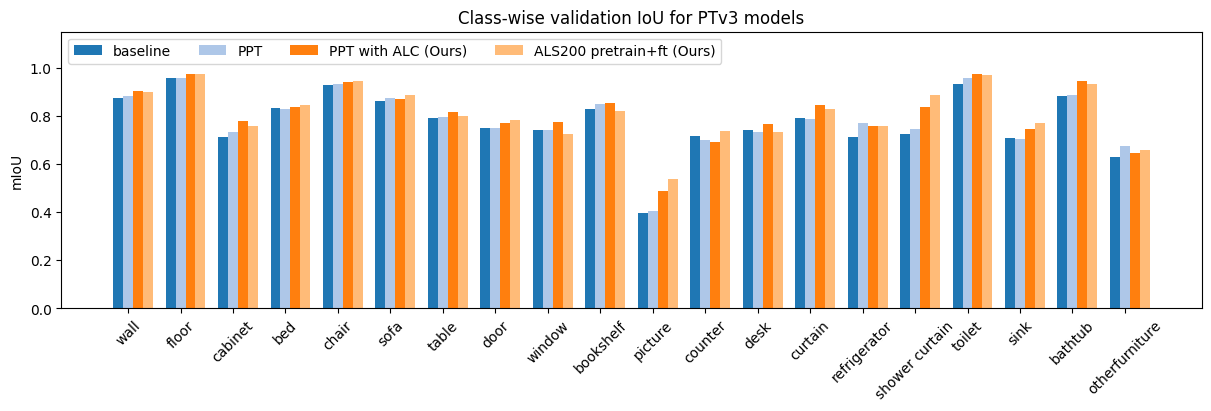

In [8]:
x = np.arange(20)  # the label locations
width = 0.19  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for i, (trial, data_item) in enumerate(data.items()):
    offset = width * multiplier
    color = cmap(i)
    data_arr = np.array([data_item[name] for name in CLASS_LABELS_20])
    rects = ax.bar(x + offset, data_arr, width, label=trial, color=color)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # if trial == "PPT":
    #     multiplier += 1
        
# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mIoU')
ax.set_title('Class-wise validation IoU for PTv3 models')
ax.set_xticks(x + width, CLASS_LABELS_20, rotation=45)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.15)
# ax.set_lim(0, 1)

plt.savefig("ScanNet_comparison_PTv3.pdf")
plt.show()